import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [7]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/42

make measure image

In [8]:
def_img = io.imread("image\\10.16.2020 Heptane-60%water40%ethanol\\frame 2\\1-25-47 PM\\10.16.2020 (3) 1354.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

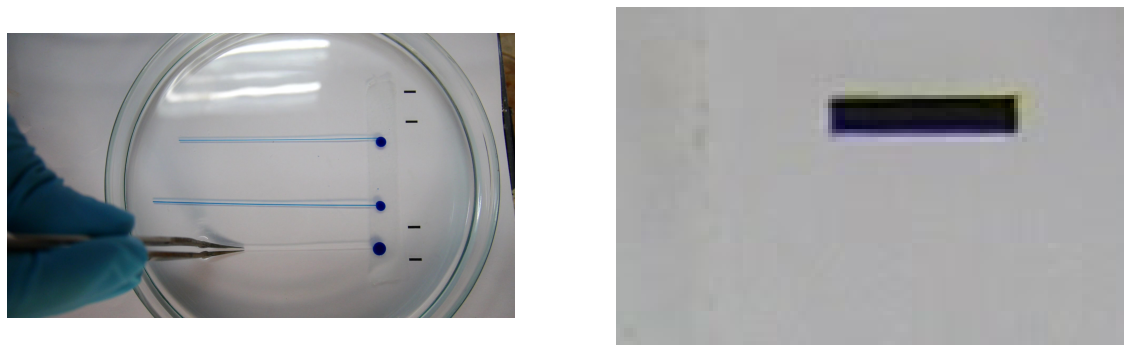

In [9]:
measure_im = crop(def_img, ((200, 800), (1450, 350), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

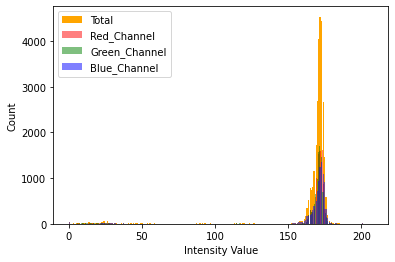

In [10]:
plot_histogram(measure_im)

[26, 51]
[26, 93]


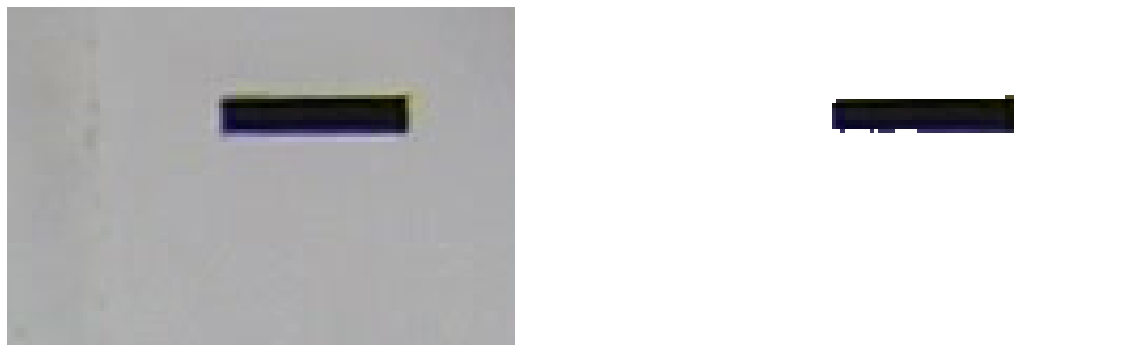

length of picture is  42.0 pixel


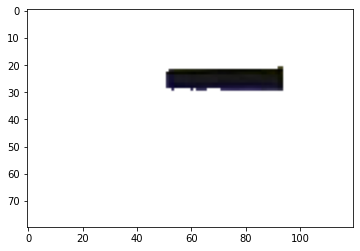

In [11]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

42 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 42


find definition length 

(1080, 1920, 3) (130, 550, 3)


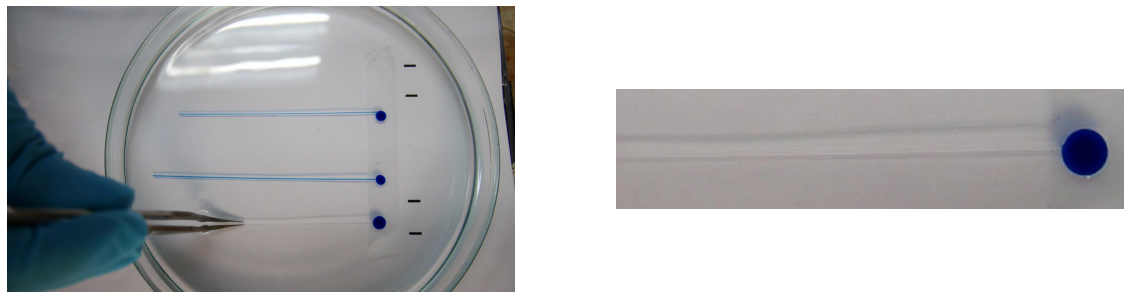

In [22]:
def_crop_im = crop(def_img, ((750, 200), (900, 470), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

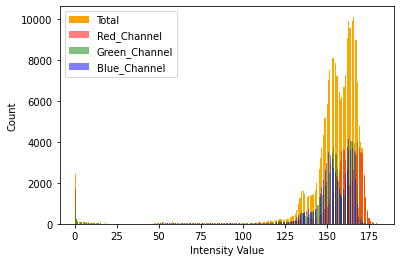

In [23]:
plot_histogram(def_crop_im)

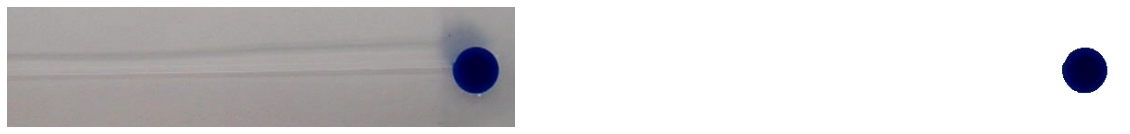

In [24]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[68, 483]
[69, 531]
ldef  48.010415536631214 pixel


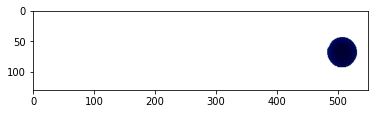

In [25]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 1354 to 1469

In [26]:
number_of_picture = 1354
thresh = 45
template1 = []
l_def = 48.010415536631214
#1469-1354 = 115
for i in range(116):
    if(True) :   
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 2\\1-25-47 PM\\10.16.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((750, 200), (900, 470), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [27]:
print(template1)
print(len(template1))

[0, 1, 1, 3, 3, 5, 7, 9, 12, 14, 16, 19, 21, 23, 27, 29, 32, 34, 37, 39, 41, 44, 46, 47, 49, 54, 55, 57, 59, 61, 64, 66, 68, 70, 73, 76, 78, 80, 82, 85, 86, 88, 91, 92, 95, 95, 98, 101, 102, 104, 106, 108, 110, 112, 114, 117, 118, 119, 122, 123, 126, 127, 128, 133, 133, 135, 138, 140, 142, 143, 146, 148, 149, 152, 153, 155, 157, 158, 160, 162, 164, 165, 167, 169, 171, 173, 174, 176, 177, 179, 181, 181, 184, 186, 188, 188, 191, 192, 195, 197, 198, 199, 200, 203, 204, 205, 207, 208, 209, 213, 213, 216, 217, 219, 221, 222]
116


find length on crop value 2 from 1470 to 3647

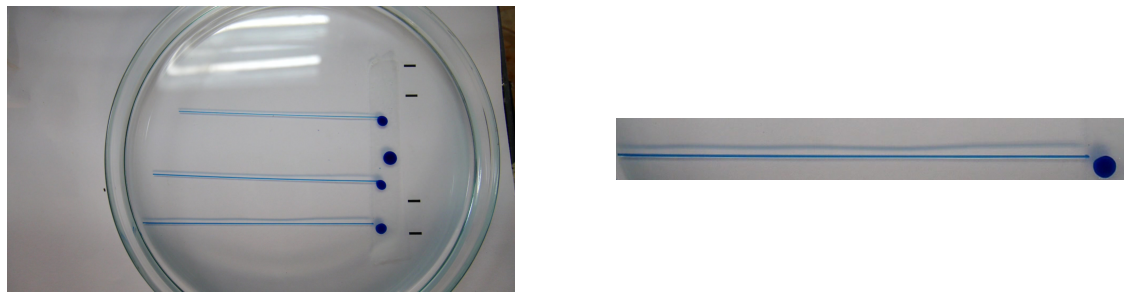

In [36]:
image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 2\\1-25-47 PM\\10.16.2020 (3) " + str(3647).zfill(4) + ".jpg" )
crop_image = crop(image, ((750, 215), (510, 470), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [37]:
number_of_picture = 1470
thresh = 45
template2 = []
l_def = 48.010415536631214
#3647-1470 = 2177
for i in range(2178):
    if( True) :
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 2\\1-25-47 PM\\10.16.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((750, 215), (510, 470), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [38]:
print(template2)
print(len(template2))

[224, 225, 229, 229, 229, 231, 233, 235, 236, 237, 240, 242, 244, 245, 246, 247, 249, 251, 252, 253, 255, 257, 258, 261, 261, 262, 263, 266, 267, 268, 270, 271, 272, 274, 275, 277, 277, 280, 280, 284, 285, 286, 288, 288, 291, 291, 293, 293, 296, 297, 299, 300, 302, 302, 304, 305, 305, 310, 309, 309, 311, 313, 316, 317, 317, 318, 321, 322, 323, 324, 325, 327, 328, 329, 328, 332, 334, 335, 336, 337, 338, 341, 341, 342, 344, 346, 345, 346, 349, 350, 351, 351, 353, 355, 356, 357, 359, 360, 361, 361, 362, 364, 364, 366, 368, 370, 370, 372, 372, 373, 375, 377, 377, 379, 380, 382, 383, 384, 386, 386, 388, 389, 389, 391, 392, 393, 395, 396, 396, 398, 399, 400, 401, 402, 405, 405, 405, 406, 409, 408, 411, 410, 412, 413, 414, 416, 417, 419, 420, 421, 420, 423, 424, 425, 427, 428, 427, 430, 430, 431, 432, 435, 436, 437, 437, 438, 439, 440, 441, 443, 444, 445, 446, 445, 448, 450, 450, 452, 454, 454, 455, 455, 456, 457, 459, 458, 461, 462, 463, 465, 466, 466, 468, 468, 468, 470, 471, 472, 474, 475,

concat 2 template and calculate pixel to centimeter

In [39]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [40]:
print(l_array)

[ 0.          0.01190476  0.01190476 ... 10.392858   10.392858
 10.392858  ]


export data to exel

In [41]:
import pandas as pd

In [42]:
print(len(l_array))

2294


In [43]:
data = []
num_img = 1354
for i in range(len(l_array)):
    data.append(( " 10.16.2020 (3) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-60-40(2)_10.16.2020_1-25-47-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


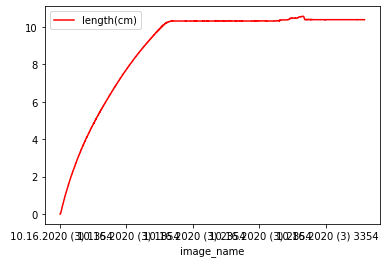

In [44]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()